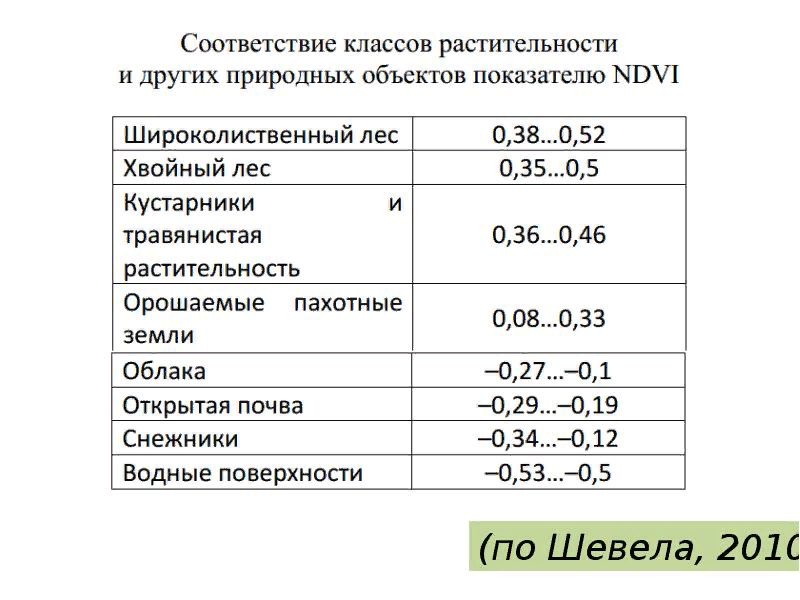

In [1]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

full = train.append(test).reset_index()
full.is_train = 0
full.loc[~full.Culture.isnull(), 'is_train']= 1
full.loc[full.Culture.isnull(), 'is_train'] = 0

print(train.shape, test.shape)

(2838, 370) (939, 369)


In [3]:
train.head(5)

Year  Field ID  Field Area   Day 1   Day 2   Day 3   Day 4   Day 5   Day 6  \
0  2018       517       48.64  0.5369  0.5371  0.5375  0.5379  0.5384  0.5390   
1  2019      1395       80.41  0.1159  0.1096  0.1034  0.0971  0.0909  0.0846   
2  2017        44       43.64 -0.0204 -0.0207 -0.0210 -0.0212 -0.0215 -0.0218   
3  2018      1591       79.34  0.4827  0.4576  0.4324  0.4073  0.3821  0.3570   
4  2017       681      144.76 -0.0202 -0.0191 -0.0181 -0.0170 -0.0160 -0.0150   

    Day 7  ...  Day 358  Day 359  Day 360  Day 361  Day 362  Day 363  Day 364  \
0  0.5397  ...   0.4362   0.4322   0.4283   0.4243   0.4203   0.4163   0.4123   
1  0.0783  ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2 -0.0220  ...   0.0833   0.1149   0.1466   0.1782   0.2099   0.2415   0.2732   
3  0.3318  ...   0.2657   0.2668   0.2680   0.2692   0.2705   0.2717   0.2730   
4 -0.0140  ...  -0.0354  -0.0358  -0.0361  -0.0365  -0.0369  -0.0372  -0.0376   

   Day 365  Day 366  Culture  
0   0.4084      NaN        4  
1      NaN      NaN       17  
2   0.3048      NaN        2  
3   0.2743      NaN        4  
4  -0.0379      NaN        4  

[5 rows x 370 columns]

# EDA

In [4]:
train.describe()

Year     Field ID   Field Area        Day 1        Day 2  \
count  2838.000000  2838.000000  2838.000000  2838.000000  2838.000000   
mean   2017.259338   845.647639   106.608302     0.207495     0.205959   
std       1.255671   605.755332    72.944998     0.212510     0.211975   
min    2015.000000     1.000000     5.990000    -0.141800    -0.133400   
25%    2016.000000   255.250000    63.380000     0.010575     0.008750   
50%    2017.000000   743.500000    87.185000     0.154000     0.155200   
75%    2018.000000  1463.750000   124.370000     0.354550     0.356075   
max    2019.000000  1892.000000   560.730000     0.802900     0.803800   

             Day 3        Day 4        Day 5        Day 6        Day 7  ...  \
count  2838.000000  2838.000000  2838.000000  2838.000000  2838.000000  ...   
mean      0.204435     0.202948     0.201810     0.200738     0.199660  ...   
std       0.211715     0.211787     0.211938     0.212393     0.213124  ...   
min      -0.126600    -0.124800    -0.122200    -0.121200    -0.125400  ...   
25%       0.007000     0.005225     0.003100     0.001000    -0.000275  ...   
50%       0.151300     0.154100     0.155650     0.152600     0.154550  ...   
75%       0.355750     0.353200     0.352825     0.348275     0.346275  ...   
max       0.804700     0.805500     0.806400     0.807300     0.808100  ...   

           Day 358      Day 359      Day 360      Day 361      Day 362  \
count  2362.000000  2362.000000  2362.000000  2362.000000  2362.000000   
mean      0.198520     0.196360     0.191499     0.186658     0.181817   
std       0.195781     0.195195     0.192634     0.190466     0.188438   
min      -0.161000    -0.158000    -0.155000    -0.152000    -0.157700   
25%       0.004125     0.005000     0.007350     0.003575     0.000750   
50%       0.171250     0.166200     0.162750     0.161800     0.154350   
75%       0.323375     0.322400     0.314850     0.307875     0.301975   
max       0.817700     0.820100     0.823000     0.799100     0.799300   

           Day 363      Day 364      Day 365     Day 366      Culture  
count  2362.000000  2362.000000  2362.000000  447.000000  2838.000000  
mean      0.177668     0.173420     0.168890    0.088671     6.200141  
std       0.186766     0.185895     0.185588    0.126895     4.159082  
min      -0.167000    -0.158600    -0.150200   -0.137000     1.000000  
25%      -0.000400     0.000025    -0.000575   -0.013150     4.000000  
50%       0.136400     0.128000     0.116400    0.045100     4.000000  
75%       0.298375     0.295000     0.292425    0.192300     8.000000  
max       0.799500     0.799700     0.799800    0.516100    28.000000  

[8 rows x 370 columns]

In [5]:
test.describe()

Year     Field ID  Field Area       Day 1       Day 2  \
count   939.000000   939.000000  939.000000  939.000000  939.000000   
mean   2018.990415   614.739084  109.074888    0.121286    0.117349   
std       0.156296   448.125897   72.584004    0.169712    0.168228   
min    2015.000000     1.000000   13.010000   -0.125400   -0.121900   
25%    2019.000000   215.500000   61.310000   -0.012100   -0.013150   
50%    2019.000000   549.000000   91.260000    0.051300    0.046700   
75%    2019.000000   978.000000  135.300000    0.235950    0.230400   
max    2019.000000  1875.000000  662.000000    0.802800    0.801100   

            Day 3       Day 4       Day 5       Day 6       Day 7  ...  \
count  939.000000  939.000000  939.000000  939.000000  939.000000  ...   
mean     0.113949    0.110554    0.107156    0.103987    0.100897  ...   
std      0.166490    0.164941    0.163605    0.162295    0.161131  ...   
min     -0.122500   -0.125000   -0.127400   -0.129800   -0.132300  ...   
25%     -0.013000   -0.013650   -0.014550   -0.015100   -0.016050  ...   
50%      0.043800    0.040500    0.035200    0.032100    0.028500  ...   
75%      0.225250    0.218650    0.215800    0.211450    0.209400  ...   
max      0.799400    0.797700    0.796000    0.794400    0.792700  ...   

       Day 357   Day 358   Day 359   Day 360   Day 361   Day 362   Day 363  \
count  5.00000  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000   
mean   0.23260  0.229120  0.225620  0.222100  0.218580  0.215060  0.211480   
std    0.18688  0.182076  0.177405  0.172919  0.168577  0.164391  0.160452   
min   -0.03470 -0.032000 -0.029300 -0.026700 -0.024000 -0.021300 -0.018700   
25%    0.12620  0.123700  0.121200  0.118800  0.116300  0.113900  0.111400   
50%    0.27790  0.277900  0.277900  0.277800  0.277800  0.277800  0.277700   
75%    0.37500  0.373100  0.371200  0.369200  0.355700  0.340000  0.324300   
max    0.41860  0.402900  0.387100  0.371400  0.367100  0.364900  0.362700   

        Day 364   Day 365  Day 366  
count  5.000000  5.000000      0.0  
mean   0.207920  0.204380      NaN  
std    0.156685  0.153139      NaN  
min   -0.016000 -0.013300      NaN  
25%    0.108900  0.106500      NaN  
50%    0.277700  0.277700      NaN  
75%    0.308600  0.292900      NaN  
max    0.360400  0.358100      NaN  

[8 rows x 369 columns]

**Наблюдения:**
1. В зимние дни у некоторых культур очень высокие показатели > 0.5, возможно тогда что нумерация дней начинается не с начала года, а с начала наблюдений, либо культуры растут в тех районах, где могут расти зимой.
2. В тесте преимущественно 19 год
    
    

### Target

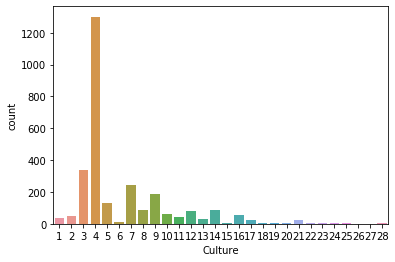

In [6]:
sns.countplot(train['Culture'])

In [7]:
cult_count = train.groupby('Culture')['Culture'].count()
common_cultures = list(cult_count[cult_count>7].index)
rare_cultures = list(cult_count[cult_count<=7].index)
print(f"Редкие классы (меньше 7 экземплярова класса в трейне): {rare_cultures}")
print(f"Доля экземпляров редких классов в трейне от всего обьёма трейна: {train[train.Culture.isin(rare_cultures)].shape[0]/train.shape[0]*100:.3}%")

Редкие классы (меньше 7 экземплярова класса в трейне): [15, 18, 19, 20, 23, 24, 25, 26, 27, 28]
Доля экземпляров редких классов в трейне от всего обьёма трейна: 1.27%


**Наблюдения:**  Явный дисбаланс классов

### Пропущенные значения

 Посмотрим на столбцы, где кол-во пропущенных значений составляет более 25% от выборки

In [8]:
print(f'Train size: {train.shape[0]}')
train_null = train.isnull().sum()
train_null[train_null/train.shape[0] > 0.25]

Train size: 2838


Day 366    2391
dtype: int64

In [9]:
print(f'Test size: {test.shape[0]}')
test_null = test.isnull().sum()
test_null[test_null/test.shape[0] > 0.25]

Test size: 939


Day 291    338
Day 292    460
Day 293    479
Day 294    560
Day 295    415
          ... 
Day 362    934
Day 363    934
Day 364    934
Day 365    934
Day 366    939
Length: 76, dtype: int64

In [10]:
print(f'Train+test size: {full.shape[0]}')
full_null = full.isnull().sum()
full_null[full_null/full.shape[0] > 0.25][:5]

Train+test size: 3777


Day 328    1068
Day 329    1074
Day 330    1221
Day 331    1221
Day 332    1221
dtype: int64

* Видно, что больше всего значений пропущенно в последние 2 месяца. 
* Более того, в тестовой выборке соотношение кол-ва пропущенных к общим значениям за посление 2 месяца вырастает с  приблизитеьно 50% до 100%. 

Возможно, эти месяцы лучше будет исключить.

## Feature engineering

### Агрегирование по месяцам

Чтобы уменьшить размерность, создадим новые признаки, которые будут показывать среднее значение индекса по каждому месяцу.

In [11]:
months = {
    1: ('Day 1', 'Day 31'),
    2: ('Day 32', 'Day 59'),
    3: ('Day 60', 'Day 90'),
    4: ('Day 91', 'Day 120'),
    5: ('Day 121', 'Day 151'),
    6: ('Day 152', 'Day 181'),
    7: ('Day 182', 'Day 212'),
    8: ('Day 213', 'Day 343'),
    9: ('Day 244', 'Day 273'),
    10: ('Day 274', 'Day 304')}

In [12]:
monthly_train = pd.DataFrame()
for key in months:
    monthly_train[key] = train.loc[:, months[key][0]:months[key][1]].mean(axis = 1)
monthly_train[['Year','Field ID','Field Area', 'Culture']] = train[['Year','Field ID','Field Area','Culture']]
monthly_train.head(3)

1         2         3         4         5         6         7  \
0  0.562606  0.624100  0.631610  0.801607  0.879994  0.562967  0.330203   
1  0.034458 -0.019171  0.020074  0.281010  0.650181  0.677033  0.737332   
2 -0.023316 -0.018068  0.153235  0.247283  0.332584  0.592100  0.752852   

          8         9        10  Year  Field ID  Field Area  Culture  
0  0.318463  0.265753  0.345381  2018       517       48.64        4  
1  0.460947  0.416287  0.354252  2019      1395       80.41       17  
2  0.350657  0.309303  0.395200  2017        44       43.64        2

In [13]:
monthly_test = pd.DataFrame()
for key in months:
    monthly_test[key] = test.loc[:, months[key][0]:months[key][1]].mean(axis = 1)
monthly_test[['Year','Field ID','Field Area']] = test[['Year','Field ID','Field Area']]

#### График среднемесячных индексов по культурам

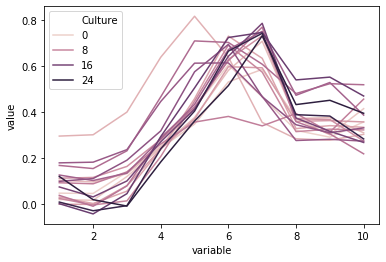

In [14]:
m_ag = monthly_train.drop(['Year','Field ID','Field Area'], axis = 1).groupby('Culture').mean()
m_ag = m_ag.loc[common_cultures]
m_ag.reset_index(inplace = True)
m_ag_melted = pd.melt(m_ag, id_vars=['Culture'])
sns.lineplot(data = m_ag_melted, x='variable', y = 'value', hue = 'Culture')

**Наблюдения:**

* Среди всех культур видена общая тренденция: в зимние месяцы - низкий индекс, в летние - высокий.
* Предположение о том, что нумерация начинается с начала года, подтвердилась.   

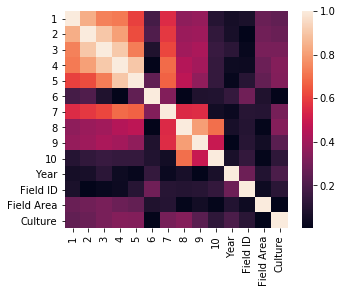

In [15]:
plt.figure(figsize=(5, 4)) 
sns.heatmap(abs(monthly_train.corr()))

### Корень среднемесячного индекса

Так как индекс находится в диапозоне от -1 до 1, то, возможно, взяв корень, мы сможем сделать некоторые классы более различимыми.

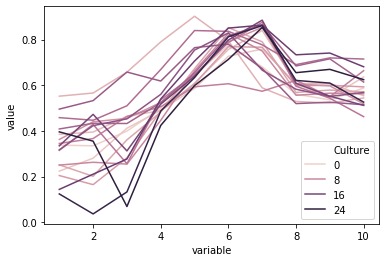

In [16]:
root_train = pd.DataFrame()
for month in range(1,11):
    root_train[month] = monthly_train[month]**(1/2)
root_train['Culture'] = train['Culture']

root_test = pd.DataFrame()
for month in range(1,11):
    root_test[month] = monthly_test[month]**(1/2)
    
m_ag = root_train.groupby('Culture').mean()
m_ag = m_ag.loc[common_cultures]
m_ag.reset_index(inplace = True)
m_ag_melted = pd.melt(m_ag, id_vars=['Culture'])
sns.lineplot(data =m_ag_melted, x='variable', y = 'value', hue = 'Culture')

### Признак (-)/(+)

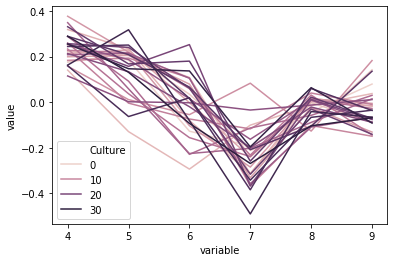

In [17]:
dn_train = pd.DataFrame()
for month in range(1,10):
    dn_train[month] = (monthly_train[month+1]-monthly_train[month])/(monthly_train[month+1]+monthly_train[month])
dn_train['Culture'] = train['Culture']

dn_test = pd.DataFrame()
for month in range(1,10):
    dn_test[month] = (monthly_test[month+1]-monthly_test[month])/(monthly_test[month+1]+monthly_test[month])
    
    
m_ag = dn_train.groupby('Culture').mean()
m_ag.reset_index(inplace = True)
m_ag_melted = pd.melt(m_ag, id_vars=['Culture'])
sns.lineplot(data = m_ag_melted[m_ag_melted.variable.isin(range(4,11))], x='variable', y = 'value', hue = 'Culture')

### Распределение признаков в train и test

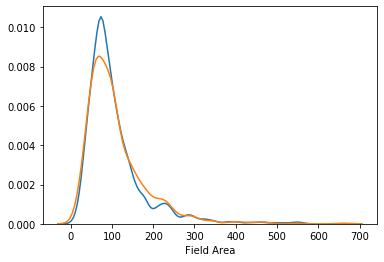

In [18]:
sns.distplot(train['Field Area'], hist=False)
sns.distplot(test['Field Area'], hist=False)

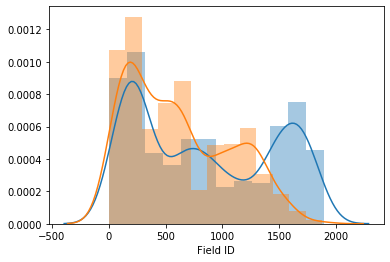

In [19]:
sns.distplot(train['Field ID'])
sns.distplot(test['Field ID'])

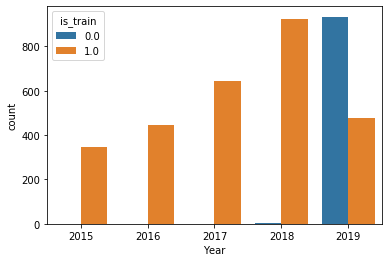

In [20]:
sns.countplot(x = 'Year',data = full, hue = 'is_train')

#### Распределение среднемесячных индексов в train и test по месяцам

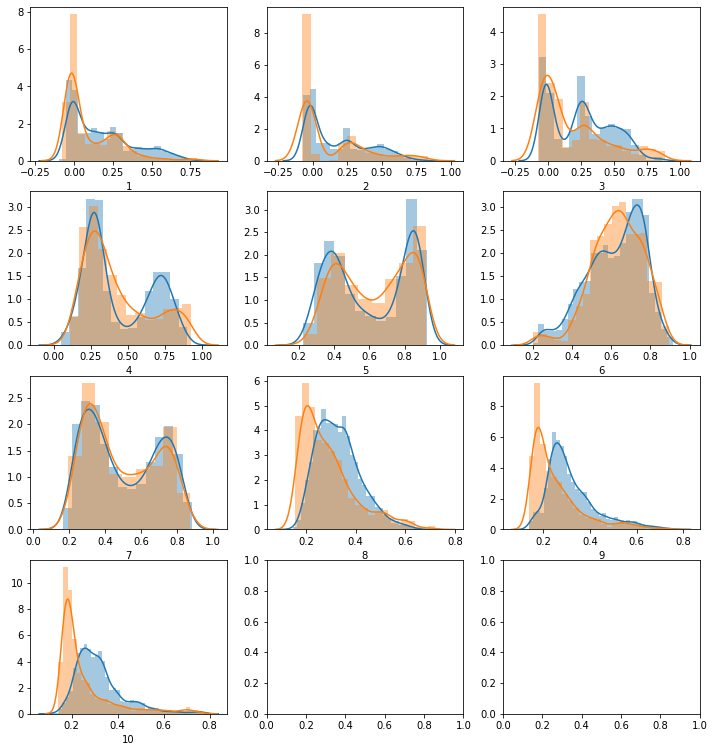

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 13))

for m in range(1,11):
    sns.distplot(monthly_train[m], ax=axes[(m-1) // 3, (m-1) % 3])
    sns.distplot(monthly_test[m], ax=axes[(m-1) // 3, (m-1) % 3])

**Наблюдения:**

Обучающая и тестовая выборки распределены не одинаковым образом:
1. В тесте большинство данных 19 года.
2. В помесячном сравнении до 7 месяца распределение сходжее, однако с 8 месяца распределение теста сдвинуто влево, относительно трейна, в 12 месяце распределения очень отличаются(возможно, из-за очень большого кол-ва пропусков в 12 месяце в тестовой выброрке)


#### Все признаки

In [22]:
monthly_train = monthly_train.drop(['Culture', 'Field Area', 'Year', 'Field ID'], axis=1).add_suffix('_m')
monthly_test = monthly_test.drop(['Field Area', 'Year', 'Field ID'], axis=1).add_suffix('_m')

dn_train = dn_train.drop('Culture', axis=1).add_suffix('_dn')
dn_test = dn_test.add_suffix('_dn')

root_train =root_train.drop('Culture', axis=1).add_suffix('_r')
root_test = root_test.add_suffix('_r')

In [23]:
whole_train = monthly_train.join(dn_train).join(root_train)
whole_train[['Field Area', 'Year', 'Field ID', 'Culture']] = train[['Field Area', 'Year', 'Field ID', 'Culture']]

whole_test = monthly_test.join(dn_test).join(root_test)
whole_test[['Field Area', 'Year', 'Field ID']] = test[['Field Area', 'Year', 'Field ID']]

whole_train.shape, whole_test.shape

((2838, 33), (939, 32))

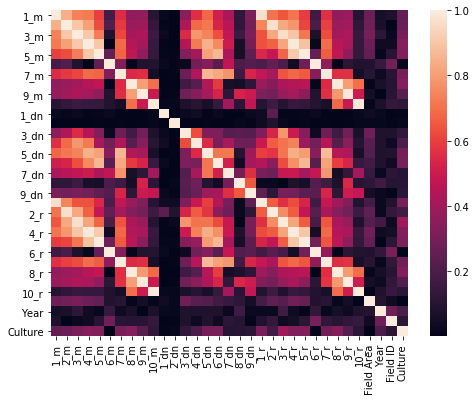

In [24]:
plt.figure(figsize=(8, 6)) 
sns.heatmap(abs(whole_train.corr()))

### Проверка наличия ковариантного сдвига

Чтобы объективно оценить обобщающую способность алгоритма, нужно оценить насколько обучающая и тестовая выборки схожи.

Данный код осован на материалах [этой статьи](https://habr.com/ru/post/422185/)

In [25]:
def cov_shift_df(df_train, df_test):
    train = df_train.drop('Culture', axis = 1)
    test = df_test.copy()

    #найдем столбцы в которых >50% пропусков в тесте и удалим их
    cols = test.isnull().sum() > test.shape[0]*0.5
    train = train.drop(cols[cols].index, axis=1)
    test = test.drop(cols[cols].index, axis=1)
    
    imputer = KNNImputer(n_neighbors=5, weights="distance")

    train  = pd.DataFrame(imputer.fit_transform(train), index = train.index)
    test = pd.DataFrame(imputer.transform(test),index = test.index)
    
    train.columns = df_train.drop('Culture', axis = 1).drop(cols[cols].index, axis = 1).columns
    test.columns = train.columns
    train['Culture'] = df_train['Culture']

    #объединение выборок train, test
    df_combine = pd.concat([train, test], axis=0, ignore_index=True)

    #добавляем новый столбец к данным, нулевой к test, единичный к train
    df_combine['is_train'] = 1
    df_combine.loc[df_combine.Culture.isnull(), 'is_train'] = 0

    #удаление метки 'Culture'
    df_combine = df_combine.drop('Culture', axis =1)

    y = df_combine['is_train'].values #индикатор источника 
    x = df_combine.drop('is_train', axis=1).values #объединенный датасет

    rfc = RandomForestClassifier(n_jobs=-1, max_depth=5, min_samples_leaf = 5, random_state=31)
    predictions = np.zeros(y.shape) #пустой массив для вероятностей классов

    from sklearn.model_selection import StratifiedKFold, cross_val_score
    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=31)
    for fold, (train_idx, test_idx) in enumerate(skf.split(x, y)):
        X_train, X_test = x[train_idx], x[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        rfc.fit(X_train, y_train)
        probs = rfc.predict_proba(X_test) #предсказание вероятностей классов
        predictions[test_idx] = probs[:,1]

    from sklearn.metrics import roc_auc_score
    print('Shift ROC-AUC:', roc_auc_score(y_true=y, y_score=predictions))
    
    f_i = pd.DataFrame()
    f_i['Features'] = df_train.drop('Culture', axis = 1).drop(cols[cols].index, axis = 1).columns
    f_i['Weights'] = rfc.feature_importances_
    f_i = f_i.sort_values(by='Weights', ascending = False)
    return f_i

In [26]:
cov_shift_feature_importance = cov_shift_df(whole_train, whole_test)
cov_shift_feature_importance[:10]

Shift ROC-AUC: 0.9836495574663343


Features   Weights
29      Year  0.342788
9       10_m  0.078300
8        9_m  0.074394
30  Field ID  0.066927
27      10_r  0.052805
1        2_m  0.040996
26       9_r  0.039996
2        3_m  0.029433
17      8_dn  0.027884
14      5_dn  0.022080

* ROC AUC близко к 1. То есть, классификатор с хорошо разделяет объекты на обучающий и тестовый датасет. Такая картина свидетельствует о сильном ковариантном сдвиге в данных.
* Признаки, вызывающие наибольший сдвиг, можно попробовать убрать из выборок, особенно если их вклад в предсказательную способность итоговой модели будет небольшим.

# Model training

In [27]:
X_train = whole_train.drop(['Culture'], axis=1)
y_train = whole_train['Culture']
train_indexes = whole_train.index

In [28]:
print(X_train.shape, y_train.shape)

(2838, 32) (2838,)


### Cross-val

In [29]:
# Set our parameter grid
param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [50, 100, 300],
    'max_features': ['auto', 'log2'],
    'max_depth' : [3, 5, None]    
}

In [30]:
X_tt, X_tv, i_tt, i_tv = train_test_split(X_train, train_indexes, test_size=0.25, random_state=31)

y_tt = y_train[i_tt]
y_tv = y_train[i_tv]

val_indexes = i_tv
val_classes = set(y_tv)

In [31]:
imputer = KNNImputer(n_neighbors=5, weights="distance")

X_tt = pd.DataFrame(imputer.fit_transform(X_tt), index = X_tt.index)
X_tv = pd.DataFrame(imputer.transform(X_tv),index = X_tv.index)
                    
X_tt.columns = X_train.columns
X_tv.columns = X_train.columns

In [32]:
model = RandomForestClassifier(random_state=31)
model_CV = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'f1_weighted')
model_CV.fit(X_tt, y_tt)
print(model_CV.best_params_)

C:\Users\77\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 300}


In [33]:
model = RandomForestClassifier(random_state=31,
  criterion = 'entropy',
  max_depth =  None,
  max_features = 'auto',
  n_estimators= 300,
  class_weight ='balanced')
scores = cross_val_score(model, X_tt, y_tt, cv=5, scoring = 'f1_weighted')
print(f"Cross-val-score: {scores.mean():.5f}, std: {scores.std():.3f}")

C:\Users\77\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Cross-val-score: 0.86364, std: 0.023


### Validation

In [34]:
model.fit(X_tt,y_tt)
preds_valid = model.predict(X_tv)

print(f1_score(y_tv, preds_valid, average='weighted'))
print(classification_report(y_tv, preds_valid))

0.8684260165548741
              precision    recall  f1-score   support

           1       0.86      0.67      0.75         9
           2       0.93      1.00      0.96        13
           3       0.79      0.90      0.84        81
           4       0.96      1.00      0.98       335
           5       0.63      0.97      0.76        30
           7       0.81      0.87      0.84        54
           8       0.65      0.55      0.59        20
           9       0.96      0.96      0.96        46
          10       1.00      0.72      0.84        18
          11       0.82      0.75      0.78        12
          12       0.83      0.71      0.77        21
          13       0.00      0.00      0.00        10
          14       1.00      0.75      0.86        20
          15       0.00      0.00      0.00         3
          16       0.83      0.83      0.83        12
          17       1.00      0.83      0.91         6
          18       0.00      0.00      0.00         2
        

C:\Users\77\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
f_i = pd.DataFrame()
f_i['Features'] = X_tt.columns
f_i['Weights'] = model.feature_importances_
f_i.sort_values(by='Weights', ascending = False)

Features   Weights
25         7_r  0.071562
6          7_m  0.069386
15        6_dn  0.058537
4          5_m  0.046261
23         5_r  0.041998
22         4_r  0.041693
16        7_dn  0.039857
3          4_m  0.037573
14        5_dn  0.036427
31    Field ID  0.036138
5          6_m  0.031939
13        4_dn  0.030912
2          3_m  0.029543
24         6_r  0.029394
26         8_r  0.027309
1          2_m  0.026783
19         1_r  0.025966
12        3_dn  0.025893
21         3_r  0.025382
17        8_dn  0.025109
7          8_m  0.024092
20         2_r  0.023749
27         9_r  0.023741
8          9_m  0.023678
28        10_r  0.021096
10        1_dn  0.020569
30        Year  0.020026
11        2_dn  0.019979
9         10_m  0.019663
0          1_m  0.017887
18        9_dn  0.016753
29  Field Area  0.011105

**Наблюдения:**
*  Наиболее важны для модели значения индекса в месяцы, когда происходит активый рост растений (апрель-июль), это логично: в другие месяцы, когда поля покрыты снегом или ростки ещё не взошли, индекс будет примерно одинаков вне зависимости от культуры.


In [36]:
to_exclude_rating = cov_shift_feature_importance.merge(f_i, on = 'Features', suffixes = ['_shift', '_importance'])
to_exclude_rating['exclude'] = -0.4*to_exclude_rating['Weights_shift'] + 0.6*to_exclude_rating['Weights_importance']
to_exclude_rating.sort_values(by='exclude')

Features  Weights_shift  Weights_importance   exclude
0         Year       0.342788            0.020026 -0.125099
1         10_m       0.078300            0.019663 -0.019522
2          9_m       0.074394            0.023678 -0.015551
4         10_r       0.052805            0.021096 -0.008465
3     Field ID       0.066927            0.036138 -0.005088
6          9_r       0.039996            0.023741 -0.001754
5          2_m       0.040996            0.026783 -0.000328
8         8_dn       0.027884            0.025109  0.003912
11        1_dn       0.017198            0.020569  0.005463
7          3_m       0.029433            0.029543  0.005952
30  Field Area       0.001027            0.011105  0.006252
21         1_m       0.009967            0.017887  0.006746
28        9_dn       0.006152            0.016753  0.007591
10        3_dn       0.019554            0.025893  0.007714
13         8_m       0.016146            0.024092  0.007997
14         3_r       0.015271            0.025382  0.009121
12         8_r       0.016886            0.027309  0.009631
29        2_dn       0.005241            0.019979  0.009891
22         1_r       0.008911            0.025966  0.012015
9         5_dn       0.022080            0.036427  0.013024
20         6_r       0.010128            0.029394  0.013585
24        4_dn       0.008149            0.030912  0.015288
23         6_m       0.008320            0.031939  0.015835
17        7_dn       0.011834            0.039857  0.019180
26         4_m       0.007105            0.037573  0.019702
18         4_r       0.011002            0.041693  0.020615
27         5_r       0.006607            0.041998  0.022556
25         5_m       0.007529            0.046261  0.024745
16        6_dn       0.013233            0.058537  0.029829
15         7_m       0.013454            0.069386  0.036250
19         7_r       0.010683            0.071562  0.038664

Исключим 10 признаков имеющих наименьшее значении в столбце exclude

In [37]:
features_to_exclude = list(to_exclude_rating.sort_values(by='exclude')[:10]['Features'])

In [40]:
def validation(whole_train, whole_test, features_to_exclude):
    
    #splitting
    cov_shift_feature_importance = cov_shift_df(whole_train.drop(columns = features_to_exclude),
                                                whole_test.drop(columns = features_to_exclude))
    
    X_train = whole_train.drop(columns = features_to_exclude).drop(['Culture'], axis=1)
    train_indexes = X_train.index

    y_train = whole_train['Culture']

    X_tt, X_tv, i_tt, i_tv = train_test_split(X_train, train_indexes, test_size=0.25, random_state=31)

    y_tt = y_train[i_tt]
    y_tv = y_train[i_tv]

    val_indexes = i_tv
    val_classes = set(y_tv)
    
    #imputing
    imputer = KNNImputer(n_neighbors=5, weights="distance")

    X_tt = pd.DataFrame(imputer.fit_transform(X_tt), index = X_tt.index)
    X_tv = pd.DataFrame(imputer.transform(X_tv),index = X_tv.index)

    X_tt.columns = X_train.columns
    X_tv.columns = X_train.columns
    
    #cross-validation
    model = RandomForestClassifier(random_state=31,
      criterion = 'entropy',
      max_depth =  None,
      max_features = 'auto',
      n_estimators= 300,
      class_weight ='balanced')
    
    scores = cross_val_score(model, X_tt, y_tt, cv=5, scoring = 'f1_weighted')
    print(f"Cross-val-score: {scores.mean():.5f}, std: {scores.std():.3f}")
    
    #classification report
    model.fit(X_tt,y_tt)
    preds_valid = model.predict(X_tv)

    print(classification_report(y_tv, preds_valid))
    
    #making table
    f_i = pd.DataFrame()
    f_i['Features'] = X_tt.columns
    f_i['Weights'] = model.feature_importances_
    to_exclude_rating = cov_shift_feature_importance.merge(f_i, on = 'Features', suffixes = ['_shift', '_importance'])
    to_exclude_rating['exclude'] = -0.4 * to_exclude_rating['Weights_shift'] + 0.6*to_exclude_rating['Weights_importance']
    return to_exclude_rating

In [41]:
to_exclude_rating = validation(whole_train, whole_test, features_to_exclude)
to_exclude_rating.sort_values(by='exclude')

Shift ROC-AUC: 0.893465451753586


C:\Users\77\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Cross-val-score: 0.82430, std: 0.018
              precision    recall  f1-score   support

           1       0.58      0.78      0.67         9
           2       0.92      0.85      0.88        13
           3       0.75      0.88      0.81        81
           4       0.94      0.99      0.97       335
           5       0.64      0.83      0.72        30
           7       0.73      0.87      0.80        54
           8       0.67      0.50      0.57        20
           9       0.95      0.91      0.93        46
          10       0.80      0.44      0.57        18
          11       0.67      0.50      0.57        12
          12       0.81      0.62      0.70        21
          13       0.33      0.10      0.15        10
          14       0.88      0.75      0.81        20
          15       0.00      0.00      0.00         3
          16       0.70      0.58      0.64        12
          17       0.83      0.83      0.83         6
          18       0.00      0.00      0.00 

C:\Users\77\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Features  Weights_shift  Weights_importance   exclude
1          8_m       0.139016            0.036021 -0.033994
0          8_r       0.143840            0.042745 -0.031889
4          1_m       0.076279            0.031470 -0.011629
2         3_dn       0.092602            0.045276 -0.009875
3         7_dn       0.090584            0.056798 -0.002155
5         4_dn       0.055208            0.040738  0.002359
11        2_dn       0.034489            0.031242  0.004950
13         3_r       0.026307            0.027817  0.006168
20  Field Area       0.005535            0.019265  0.009345
19        9_dn       0.010821            0.026940  0.011836
12        5_dn       0.031787            0.043338  0.013288
15         1_r       0.022855            0.038759  0.014113
10         4_r       0.034795            0.048693  0.015298
6          5_r       0.041735            0.056007  0.016910
7          4_m       0.041440            0.056172  0.017127
17         6_r       0.016748            0.040175  0.017406
9          5_m       0.037633            0.055746  0.018394
18         6_m       0.014685            0.040828  0.018623
8         6_dn       0.039763            0.079576  0.031840
16         7_r       0.019913            0.082122  0.041308
14         7_m       0.023966            0.084991  0.041408

Несмотря на то, что значение f1 при кросс-вылидации уменьшилось с 0.86 до 0.82, ковариантный свиг между обучающей и тестовой выборкой уменьшился существеннее: с 0.98 до 0.89. Значит, модель переобучается меньше, чем раньше.

Исключим 5 признаков имеющих наименьшее значении в столбце exclude

In [42]:
features_to_exclude.extend(list(to_exclude_rating.sort_values(by='exclude')[:5]['Features']))

to_exclude_rating = validation(whole_train, whole_test, features_to_exclude)
to_exclude_rating.sort_values(by='exclude')

Shift ROC-AUC: 0.8383147921746628


C:\Users\77\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Cross-val-score: 0.77908, std: 0.024
              precision    recall  f1-score   support

           1       0.70      0.78      0.74         9
           2       0.80      0.62      0.70        13
           3       0.65      0.88      0.75        81
           4       0.95      0.99      0.97       335
           5       0.57      0.70      0.63        30
           7       0.66      0.78      0.71        54
           8       0.50      0.40      0.44        20
           9       0.93      0.93      0.93        46
          10       0.67      0.33      0.44        18
          11       0.46      0.50      0.48        12
          12       0.57      0.19      0.29        21
          13       0.20      0.10      0.13        10
          14       1.00      0.60      0.75        20
          15       0.00      0.00      0.00         3
          16       0.50      0.50      0.50        12
          17       0.57      0.67      0.62         6
          18       0.00      0.00      0.00 

C:\Users\77\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Features  Weights_shift  Weights_importance   exclude
0         2_dn       0.129784            0.053272 -0.019950
3          3_r       0.100946            0.041608 -0.015414
2         4_dn       0.105669            0.052969 -0.010486
1          4_m       0.109567            0.065630 -0.004449
6          1_r       0.073051            0.052470  0.002262
4          4_r       0.086454            0.063518  0.003529
7         5_dn       0.061087            0.054358  0.008180
15  Field Area       0.012586            0.027168  0.011267
14        9_dn       0.024615            0.040827  0.014650
10         6_m       0.031848            0.050661  0.017658
8          5_r       0.052502            0.065288  0.018172
12         6_r       0.028451            0.050560  0.018956
9          5_m       0.050848            0.068764  0.020919
5         6_dn       0.073587            0.087370  0.022988
11         7_m       0.030857            0.099130  0.047135
13         7_r       0.028148            0.103754  0.050993

Малочисленные культуры модель вообще не присваивает. Можно поробовать вовсе убрать их из обучающей выборки, чтобы лучше предсказавать большие классы, т.к из вес при подсчёте f1 будет больше.

In [43]:
to_exclude_rating = validation(whole_train[whole_train.Culture.isin(common_cultures)], whole_test, features_to_exclude)
to_exclude_rating.sort_values(by='exclude')

Shift ROC-AUC: 0.8454842463811412
Cross-val-score: 0.79346, std: 0.009
              precision    recall  f1-score   support

           1       0.80      0.67      0.73         6
           2       0.67      0.67      0.67        12
           3       0.73      0.85      0.78        97
           4       0.96      1.00      0.98       323
           5       0.70      0.77      0.73        39
           6       1.00      0.17      0.29         6
           7       0.58      0.81      0.68        52
           8       0.68      0.57      0.62        23
           9       0.94      0.94      0.94        35
          10       0.57      0.40      0.47        20
          11       0.55      0.75      0.63         8
          12       0.56      0.20      0.29        25
          13       1.00      0.17      0.29        12
          14       0.87      0.76      0.81        17
          16       0.89      0.57      0.70        14
          17       0.50      0.14      0.22         7
          

C:\Users\77\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Features  Weights_shift  Weights_importance   exclude
0         2_dn       0.148617            0.053038 -0.027624
5          1_r       0.075243            0.026467 -0.014217
2          3_r       0.100221            0.050658 -0.009694
1          4_m       0.110016            0.062111 -0.006740
4          4_r       0.092330            0.054209 -0.004407
3         4_dn       0.095311            0.058085 -0.003273
6         5_dn       0.056674            0.056707  0.011355
7          5_r       0.055610            0.056526  0.011671
15  Field Area       0.008840            0.025829  0.011961
8          5_m       0.053537            0.060402  0.014826
10         6_r       0.039826            0.052203  0.015391
11         6_m       0.030377            0.053950  0.020219
12        9_dn       0.029402            0.058253  0.023191
9         6_dn       0.048821            0.106464  0.044350
13         7_m       0.028325            0.094673  0.045473
14         7_r       0.026850            0.099009  0.048665

### Prediction

In [49]:
X_train = whole_train[whole_train.Culture.isin(common_cultures)].drop(['Culture'], axis=1).drop(columns = features_to_exclude)
X_test = whole_test.drop(columns = features_to_exclude)
y_train = whole_train[whole_train.Culture.isin(common_cultures)]['Culture']

imputer = KNNImputer(n_neighbors=5, weights="distance")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [50]:
model = RandomForestClassifier(random_state=31)
model_CV = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'f1_weighted')
model_CV.fit(X_train, y_train)
model_CV.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 300}

In [51]:
model = RandomForestClassifier(random_state=567,
  criterion = 'entropy',
  max_depth =  None,
  max_features = 'auto',
  n_estimators= 300,
  class_weight ='balanced')

model.fit(X_train, y_train)
preds = model.predict(X_test)

#pd.Series(preds).to_csv('preds.csv', index=False, header=['Culture'])

## P.S.
Для более простого востприятия неоправдавшиеся идеи и гипотезы не были включены в финальный код.

**Что ещё можно было попробовать:**
1. Посроить бинарные классификаторы отдельно для тех классов, которые изначальный классификатор часто путает, например, 3 и 7 , 5 и 8 культуры. (Было начато, но из-за того, что на промежуточном этапе результат не улучшался, идею пришлось отложить) 
2. Т.к. не рекомендуется на один участок несколько лет подряд сажать одну и ту же культуру (и, если судить по обучающей выборке, в целом это правило здесь соблюдается), можно было собрать информацию для каждого поля и использовать при обучении. (Не было реализовано, потому что предсказания модели редко нарушали правило, а делать проверку для каждого предсказания и поля было бы долго).